In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import count

In [2]:
spark = (SparkSession
.builder
.appName("Data_ingestion").getOrCreate())

In [3]:
df=spark.read.csv("test_fraud_subset.csv", header=True)

# Datatype Section

In [4]:
len(df.columns)

50

In [5]:
#shape
print((df.count(), len(df.columns)))

(127036, 50)


In [6]:
df.printSchema()


root
 |-- Transaction ID: string (nullable = true)
 |-- Transaction Date/Time: string (nullable = true)
 |-- Transaction Amount: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Merchant Name: string (nullable = true)
 |-- Merchant Category Code (MCC): string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Transaction Type: string (nullable = true)
 |-- Authorization Code: string (nullable = true)
 |-- Fraud Flag: string (nullable = true)
 |-- Transaction Status: string (nullable = true)
 |-- POS Entry Mode: string (nullable = true)
 |-- Installment Information: string (nullable = true)
 |-- Merchant ID: string (nullable = true)
 |-- Terminal ID: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Device Information: string (nullable = true)
 |-- Transaction Risk Score: string (nullable = true)
 |-- Loyalty Points Earned: string (nullable = true)
 |--

In [7]:
from pyspark.sql.types import IntegerType, DoubleType, DateType, TimestampType

# Cast each column to its correct type
df = df \
    .withColumn("Transaction ID", df["Transaction ID"].cast("string")) \
    .withColumn("Transaction Date/Time", df["Transaction Date/Time"].cast(TimestampType())) \
    .withColumn("Transaction Amount", df["Transaction Amount"].cast(DoubleType())) \
    .withColumn("Currency", df["Currency"].cast("string")) \
    .withColumn("Merchant Name", df["Merchant Name"].cast("string")) \
    .withColumn("Merchant Category Code (MCC)", df["Merchant Category Code (MCC)"].cast("integer")) \
    .withColumn("Location", df["Location"].cast("string")) \
    .withColumn("Latitude", df["Latitude"].cast(DoubleType())) \
    .withColumn("Longitude", df["Longitude"].cast(DoubleType())) \
    .withColumn("Transaction Type", df["Transaction Type"].cast("string")) \
    .withColumn("Authorization Code", df["Authorization Code"].cast("string")) \
    .withColumn("Account Balance", df["Account Balance"].cast(DoubleType())) \
    .withColumn("Fraud Flag", df["Fraud Flag"].cast("boolean")) \
    .withColumn("Transaction Status", df["Transaction Status"].cast("string")) \
    .withColumn("POS Entry Mode", df["POS Entry Mode"].cast("string")) \
    .withColumn("Installment Information", df["Installment Information"].cast("string")) \
    .withColumn("Merchant ID", df["Merchant ID"].cast("string")) \
    .withColumn("Terminal ID", df["Terminal ID"].cast("string")) \
    .withColumn("Bank Name", df["Bank Name"].cast("string")) \
    .withColumn("Card Issuer Country", df["Card Issuer Country"].cast("string")) \
    .withColumn("Transaction Channel", df["Transaction Channel"].cast("string")) \
    .withColumn("IP Address", df["IP Address"].cast("string")) \
    .withColumn("Device Information", df["Device Information"].cast("string")) \
    .withColumn("Transaction Risk Score", df["Transaction Risk Score"].cast(DoubleType())) \
    .withColumn("Loyalty Points Earned", df["Loyalty Points Earned"].cast(IntegerType())) \
    .withColumn("Cardholder's Age", df["Cardholder's Age"].cast(IntegerType())) \
    .withColumn("Cardholder's Gender", df["Cardholder's Gender"].cast("string")) \
    .withColumn("Transaction Notes", df["Transaction Notes"].cast("string")) \
    .withColumn("Cardholder's Income Bracket", df["Cardholder's Income Bracket"].cast("string")) \
    .withColumn("Fraud Detection Method", df["Fraud Detection Method"].cast("string")) \
    .withColumn("Response Time", df["Response Time"].cast(DoubleType())) \
    .withColumn("Merchant Rating", df["Merchant Rating"].cast(DoubleType())) \
    .withColumn("Recurring Transaction Flag", df["Recurring Transaction Flag"].cast("boolean")) \
    .withColumn("Customer ID", df["Customer ID"].cast("string")) \
    .withColumn("First Name", df["First Name"].cast("string")) \
    .withColumn("Last Name", df["Last Name"].cast("string")) \
    .withColumn("Email", df["Email"].cast("string")) \
    .withColumn("Phone Number", df["Phone Number"].cast("string")) \
    .withColumn("Address", df["Address"].cast("string")) \
    .withColumn("City", df["City"].cast("string")) \
    .withColumn("Country", df["Country"].cast("string")) \
    .withColumn("Birth Date", df["Birth Date"].cast(DateType()))


In [8]:
df.printSchema()


root
 |-- Transaction ID: string (nullable = true)
 |-- Transaction Date/Time: timestamp (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Merchant Name: string (nullable = true)
 |-- Merchant Category Code (MCC): integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Transaction Type: string (nullable = true)
 |-- Authorization Code: string (nullable = true)
 |-- Fraud Flag: boolean (nullable = true)
 |-- Transaction Status: string (nullable = true)
 |-- POS Entry Mode: string (nullable = true)
 |-- Installment Information: string (nullable = true)
 |-- Merchant ID: string (nullable = true)
 |-- Terminal ID: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Device Information: string (nullable = true)
 |-- Transaction Risk Score: double (nullable = true)
 |-- Loyalty Points Earned: integer (nullable = true

In [9]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType, StringType, BooleanType, TimestampType, DateType, LongType

# Cast columns to correct data types
df = df.withColumn("Transaction Date/Time", col("Transaction Date/Time").cast(TimestampType())) \
       .withColumn("Transaction Amount", col("Transaction Amount").cast(DoubleType())) \
       .withColumn("Merchant Category Code (MCC)", col("Merchant Category Code (MCC)").cast(IntegerType())) \
       .withColumn("Latitude", col("Latitude").cast(DoubleType())) \
       .withColumn("Longitude", col("Longitude").cast(DoubleType())) \
       .withColumn("Account Balance", col("Account Balance").cast(DoubleType())) \
       .withColumn("Fraud Flag", col("Fraud Flag").cast(BooleanType())) \
       .withColumn("Transaction Risk Score", col("Transaction Risk Score").cast(DoubleType())) \
       .withColumn("Loyalty Points Earned", col("Loyalty Points Earned").cast(IntegerType())) \
       .withColumn("Cardholder's Age", col("Cardholder's Age").cast(IntegerType())) \
       .withColumn("Cardholder's Gender", col("Cardholder's Gender").cast(StringType())) \
       .withColumn("Cardholder's Income Bracket", col("Cardholder's Income Bracket").cast(StringType())) \
       .withColumn("Response Time", col("Response Time").cast(DoubleType())) \
       .withColumn("Merchant Rating", col("Merchant Rating").cast(DoubleType())) \
       .withColumn("Recurring Transaction Flag", col("Recurring Transaction Flag").cast(BooleanType())) \
       .withColumn("Birth Date", col("Birth Date").cast(DateType())) \
       .withColumn("Customer Zip Code", col("Customer Zip Code").cast(DoubleType())) \
       .withColumn("Card Number", col("Card Number").cast(LongType())) \
       .withColumn("Card CVV", col("Card CVV").cast(DoubleType())) 

In [10]:
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Transaction Date/Time: timestamp (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Merchant Name: string (nullable = true)
 |-- Merchant Category Code (MCC): integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Transaction Type: string (nullable = true)
 |-- Authorization Code: string (nullable = true)
 |-- Fraud Flag: boolean (nullable = true)
 |-- Transaction Status: string (nullable = true)
 |-- POS Entry Mode: string (nullable = true)
 |-- Installment Information: string (nullable = true)
 |-- Merchant ID: string (nullable = true)
 |-- Terminal ID: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Device Information: string (nullable = true)
 |-- Transaction Risk Score: double (nullable = true)
 |-- Loyalty Points Earned: integer (nullable = true

# Basic Data Exploration

In [11]:
df.show(10)

+--------------------+---------------------+------------------+--------+--------------------+----------------------------+--------------------+-----------+-----------+----------------+------------------+----------+------------------+--------------+-----------------------+--------------------+--------------------+---------------+--------------------+----------------------+---------------------+-------------------+---------------------------+----------------------+-------------+---------------+--------------------------+--------------------+----------+---------+--------------------+--------------------+--------------------+-----------------+-------------+----------+--------------+--------------------+-------------------+-------------------+----------------+-------------------+---------------+------------------+--------------+-----------------+----------------+--------------------+-------------------+--------+
|      Transaction ID|Transaction Date/Time|Transaction Amount|Currency|       

Card Expiration Date
Cardholder's Gender
Cardholder's Income Bracket

In [12]:
# Summary statistics for numeric columns
df.select("Transaction Amount", "Transaction Risk Score", "Account Balance", "Cardholder's Age").describe().show()

+-------+------------------+----------------------+------------------+-----------------+
|summary|Transaction Amount|Transaction Risk Score|   Account Balance| Cardholder's Age|
+-------+------------------+----------------------+------------------+-----------------+
|  count|            127036|                127036|            127036|           127036|
|   mean| 4005.036285934693|   0.49977526055606186|24294.354165590863|51.32571082212916|
| stddev|3021.6688748818683|    0.2880183594535035|12881.531789491612|16.00001821920893|
|    min|             71.36|                   0.0|           2375.51|               19|
|    max|          14607.96|                   1.0|          48709.56|               77|
+-------+------------------+----------------------+------------------+-----------------+



In [13]:
# Count missing values in each column
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+--------------+---------------------+------------------+--------+-------------+----------------------------+--------+--------+---------+----------------+------------------+----------+------------------+--------------+-----------------------+-----------+-----------+----------+------------------+----------------------+---------------------+-----------------+---------------------------+----------------------+-------------+---------------+--------------------------+-----------+----------+---------+-----+------------+-------+----+-------+----------+--------------+---------+-------------------+-------------------+----------------+-------------------+---------------+-----------------+--------------+-----------------+---------+--------------------+-----------+--------+
|Transaction ID|Transaction Date/Time|Transaction Amount|Currency|Merchant Name|Merchant Category Code (MCC)|Location|Latitude|Longitude|Transaction Type|Authorization Code|Fraud Flag|Transaction Status|POS Entry Mode|Installme

# Transaction Analysis:

In [14]:
# Transaction Amount by Merchant Category (MCC)
df.groupBy("Merchant Category Code (MCC)").sum("Transaction Amount").sort(col("sum(Transaction Amount)").desc()).show()

+----------------------------+-----------------------+
|Merchant Category Code (MCC)|sum(Transaction Amount)|
+----------------------------+-----------------------+
|                        4236|              413639.14|
|                        5267|     389919.16000000003|
|                        4162|              389470.36|
|                        4223|              387297.85|
|                        4629|     385797.32000000007|
|                        5218|              378960.65|
|                        4481|              377592.72|
|                        4294|      374411.6599999999|
|                        4143|     374104.52999999997|
|                        4438|     373146.38999999996|
|                        4456|              372230.72|
|                        5930|               371074.9|
|                        4273|     370128.79000000004|
|                        5409|     367858.17000000004|
|                        5183|              366971.81|
|         

In [15]:
df.groupBy("Merchant Category Code (MCC)").avg("Transaction Amount").sort(col("avg(Transaction Amount)").desc()).show()

+----------------------------+-----------------------+
|Merchant Category Code (MCC)|avg(Transaction Amount)|
+----------------------------+-----------------------+
|                        4883|      5163.238153846153|
|                        4835|      5154.416031746031|
|                        5883|          5153.50578125|
|                        4151|          5125.26046875|
|                        4541|      5120.283548387097|
|                        5336|      5073.201632653061|
|                        4632|      5068.227000000001|
|                        5710|      5047.463606557378|
|                        4163|      5034.186363636363|
|                        4336|      5021.308095238095|
|                        4143|      4988.060399999999|
|                        4304|      4980.107246376811|
|                        5214|      4961.237413793104|
|                        4804|              4954.5575|
|                        4607|      4939.615535714285|
|         

In [16]:
# count of transactions by customer 
df.groupBy("Customer ID","First Name",'Last Name').agg(count("Transaction ID").alias("Transaction Count")).sort(col("Transaction Count").desc()).show()

+--------------------+----------+---------+-----------------+
|         Customer ID|First Name|Last Name|Transaction Count|
+--------------------+----------+---------+-----------------+
|9cedca5e-602f-406...|   Monique|Henderson|             2996|
|111b4318-5f1f-423...|      Eric|   Martin|             2992|
|28486e75-ec5b-486...|      John| Martinez|             2988|
|bc58306f-d739-4fe...|     Duane|      Lee|             2959|
|c31a0199-caee-429...|    Joshua|     Hays|             2943|
|465e6160-fd4e-4db...|      John|      Lee|             2878|
|c2a56641-a878-4dc...|    Robert|  Simpson|             2844|
|5e9fd56d-d650-461...|   Timothy| Peterson|             2842|
|8d58c806-a4e1-4cb...|     James|   Taylor|             2841|
|c994fb87-4775-4fd...|  Courtney|   Conner|             2840|
|c36a8b0c-9ce1-41d...|    Miguel|    Curry|             2838|
|83f14657-f543-4b4...|   Russell|Carpenter|             2780|
|010677ee-ef71-4b4...|  Kimberly|     Reed|             2763|
|347440e

In [17]:
#Transaction Count by Type
df.groupBy("Transaction Type").agg(count("Transaction ID").alias("Transaction Count")).show()

+----------------+-----------------+
|Transaction Type|Transaction Count|
+----------------+-----------------+
|        Purchase|            42143|
|          Refund|            42572|
|      Withdrawal|            42321|
+----------------+-----------------+



In [18]:
#Transactions Over Time
from pyspark.sql.functions import year, month, dayofmonth

# Total transaction amount by year and month
df.groupBy(year("Transaction Date/Time").alias("Year"), month("Transaction Date/Time").alias("Month")) \
.sum("Transaction Amount").orderBy("Year", "Month").show()



+----+-----+-----------------------+
|Year|Month|sum(Transaction Amount)|
+----+-----+-----------------------+
|2023|    9|   4.2987311940000005E7|
|2023|   10|   4.2290626139999986E7|
|2023|   11|    4.228632372999998E7|
|2023|   12|    4.300218781000002E7|
|2024|    1|    4.324948482999999E7|
|2024|    2|          4.025601153E7|
|2024|    3|    4.296858563999999E7|
|2024|    4|    4.138660450999998E7|
|2024|    5|    4.314823079000002E7|
|2024|    6|    4.088985616000001E7|
|2024|    7|    4.321900286000001E7|
|2024|    8|   4.3099563680000015E7|
+----+-----+-----------------------+



In [19]:
# Total count transaction amount by year and month
df.groupBy(year("Transaction Date/Time").alias("Year"), month("Transaction Date/Time").alias("Month")) \
.count().orderBy("Year", "Month").show()

+----+-----+-----+
|Year|Month|count|
+----+-----+-----+
|2023|    9|10615|
|2023|   10|10638|
|2023|   11|10552|
|2023|   12|10759|
|2024|    1|10713|
|2024|    2|10060|
|2024|    3|10807|
|2024|    4|10324|
|2024|    5|10813|
|2024|    6|10224|
|2024|    7|10730|
|2024|    8|10801|
+----+-----+-----+



# Fraud Detection Insights:

In [20]:
#Count of Fraudulent vs Non-Fraudulent Transactions
df.groupBy("Fraud Flag").count().show()  # Fraud vs. non-fraud transaction count


+----------+------+
|Fraud Flag| count|
+----------+------+
|      true|  3813|
|     false|123223|
+----------+------+



In [21]:
#Average Transaction Amount for Fraudulent Transactions
df.filter(col("Fraud Flag") == True).groupBy("Fraud Flag").avg("Transaction Amount").show()

+----------+-----------------------+
|Fraud Flag|avg(Transaction Amount)|
+----------+-----------------------+
|      true|      4973.661770259639|
+----------+-----------------------+



In [22]:
# fraud is true and false over months
df.groupBy(year("Transaction Date/Time").alias("Year"), month("Transaction Date/Time").alias("Month"), "Fraud Flag") \
.count().orderBy("Year", "Month", "Fraud Flag").show()



+----+-----+----------+-----+
|Year|Month|Fraud Flag|count|
+----+-----+----------+-----+
|2023|    9|     false|10267|
|2023|    9|      true|  348|
|2023|   10|     false|10329|
|2023|   10|      true|  309|
|2023|   11|     false|10256|
|2023|   11|      true|  296|
|2023|   12|     false|10444|
|2023|   12|      true|  315|
|2024|    1|     false|10380|
|2024|    1|      true|  333|
|2024|    2|     false| 9747|
|2024|    2|      true|  313|
|2024|    3|     false|10482|
|2024|    3|      true|  325|
|2024|    4|     false|10019|
|2024|    4|      true|  305|
|2024|    5|     false|10482|
|2024|    5|      true|  331|
|2024|    6|     false| 9952|
|2024|    6|      true|  272|
+----+-----+----------+-----+
only showing top 20 rows



In [23]:
# fraud is true and false over days of month
df.groupBy(dayofmonth("Transaction Date/Time").alias("Day"), "Fraud Flag") \
.count().orderBy("count",ascending=False).show()

+---+----------+-----+
|Day|Fraud Flag|count|
+---+----------+-----+
| 23|     false| 4126|
|  2|     false| 4121|
| 22|     false| 4110|
| 10|     false| 4109|
| 27|     false| 4107|
| 11|     false| 4089|
| 20|     false| 4087|
| 18|     false| 4085|
|  7|     false| 4078|
| 25|     false| 4071|
| 17|     false| 4070|
| 15|     false| 4069|
| 24|     false| 4056|
| 21|     false| 4054|
| 12|     false| 4051|
|  1|     false| 4050|
|  3|     false| 4043|
| 13|     false| 4034|
| 26|     false| 4031|
| 19|     false| 4030|
+---+----------+-----+
only showing top 20 rows



In [24]:
from pyspark.sql.functions import hour
df.groupBy(hour("Transaction Date/Time").alias("Hour"), "Fraud Flag") \
.count().orderBy("count",ascending=False).show()


+----+----------+-----+
|Hour|Fraud Flag|count|
+----+----------+-----+
|  10|     false| 6420|
|  13|     false| 6396|
|  15|     false| 6392|
|  22|     false| 6371|
|  21|     false| 6352|
|  19|     false| 6347|
|   8|     false| 6339|
|  16|     false| 6318|
|   9|     false| 6317|
|  14|     false| 6305|
|  17|     false| 6305|
|  12|     false| 6293|
|  20|     false| 6247|
|  11|     false| 6196|
|  18|     false| 6151|
|   3|     false| 3244|
|   2|     false| 3214|
|   0|     false| 3208|
|   4|     false| 3176|
|   1|     false| 3163|
+----+----------+-----+
only showing top 20 rows



In [25]:
#Fraudulent Transactions by Merchant Category (MCC)
df.filter(col("Fraud Flag") == True).groupBy("Merchant Category Code (MCC)").count().sort(col("count").desc()).show()


+----------------------------+-----+
|Merchant Category Code (MCC)|count|
+----------------------------+-----+
|                        5644|   10|
|                        5555|    8|
|                        5803|    7|
|                        4438|    7|
|                        5849|    7|
|                        5725|    7|
|                        4667|    7|
|                        5158|    6|
|                        5117|    6|
|                        4646|    6|
|                        4138|    6|
|                        5155|    6|
|                        5352|    6|
|                        5863|    6|
|                        5213|    6|
|                        5274|    6|
|                        4015|    6|
|                        4378|    6|
|                        5435|    6|
|                        4979|    6|
+----------------------------+-----+
only showing top 20 rows



In [26]:
#Top Merchants by Transaction Amount
# Group by merchant and sum the transaction amounts
df_top_merchants = df.groupBy("Merchant Name").sum("Transaction Amount").orderBy("sum(Transaction Amount)", ascending=False)

# Show the top 10 merchants by transaction amount
df_top_merchants.show(10)


+----------------+-----------------------+
|   Merchant Name|sum(Transaction Amount)|
+----------------+-----------------------+
|       Smith LLC|              728556.37|
|     Smith Group|      673873.0000000001|
|       Smith Inc|      588106.6799999999|
|       Smith Ltd|      553299.0599999999|
|     Johnson PLC|              544399.85|
|       Smith PLC|              541225.76|
|  Smith and Sons|               528149.6|
|Johnson and Sons|              524431.09|
|     Johnson Inc|              491553.27|
|    Williams Ltd|     480667.83999999997|
+----------------+-----------------------+
only showing top 10 rows



# Customer Insights

In [27]:
#Average Transaction Amount by Age Group
df.groupBy("Cardholder's Age").avg("Transaction Amount").orderBy("Cardholder's Age").sort(col("avg(Transaction Amount)").desc()).show()



+----------------+-----------------------+
|Cardholder's Age|avg(Transaction Amount)|
+----------------+-----------------------+
|              38|      7715.870341196292|
|              42|      7305.425776677172|
|              36|      7189.470895721925|
|              66|     7067.9849925335975|
|              50|      6052.708998268613|
|              49|      5662.897323390896|
|              64|       5205.88602098897|
|              47|      4973.781720386784|
|              69|      4874.175874973422|
|              39|      4711.458578172204|
|              43|             4604.71375|
|              37|      4556.990611385689|
|              19|       4480.73812140009|
|              62|      4243.930440118492|
|              46|      4131.367480579265|
|              61|     3914.0197989759176|
|              29|     3672.5508267636956|
|              74|      3670.462268086996|
|              72|     3630.6088886409275|
|              71|      3544.729408766565|
+----------

In [28]:
#Transaction Count by Income Bracket
df.groupBy("Cardholder's Income Bracket").count().orderBy("count", ascending=False).show()


+---------------------------+-----+
|Cardholder's Income Bracket|count|
+---------------------------+-----+
|                 ['Middle']|62854|
|                    ['Low']|40714|
|                   ['High']|23468|
+---------------------------+-----+



In [29]:
#Loyalty Points Earned Distribution
df.groupBy("Loyalty Points Earned").count().orderBy("count", ascending=False).show()

+---------------------+-----+
|Loyalty Points Earned|count|
+---------------------+-----+
|                  208|  303|
|                  134|  299|
|                    7|  296|
|                  381|  295|
|                   34|  292|
|                  320|  290|
|                  177|  289|
|                  176|  289|
|                   87|  289|
|                  112|  287|
|                  173|  286|
|                  261|  286|
|                  469|  286|
|                  305|  284|
|                  187|  284|
|                  170|  283|
|                  105|  283|
|                  236|  282|
|                  127|  282|
|                    4|  281|
+---------------------+-----+
only showing top 20 rows



In [30]:
#customer has transaction in in the same day ?
from pyspark.sql.functions import date_format, col
df.withColumn("Transaction Date", date_format(col("Transaction Date/Time"), "yyyy-MM-dd")) \
.groupBy("Customer ID", "Transaction Date").count().orderBy("count", ascending=False).show()

+--------------------+----------------+-----+
|         Customer ID|Transaction Date|count|
+--------------------+----------------+-----+
|83f14657-f543-4b4...|      2023-12-01|   21|
|52f56c3e-ca61-40c...|      2024-06-10|   19|
|40b65613-472b-430...|      2024-01-23|   19|
|010677ee-ef71-4b4...|      2024-08-19|   19|
|9cedca5e-602f-406...|      2023-09-24|   18|
|c994fb87-4775-4fd...|      2024-03-14|   18|
|c31a0199-caee-429...|      2023-12-01|   18|
|111b4318-5f1f-423...|      2024-07-04|   18|
|83f14657-f543-4b4...|      2023-09-02|   18|
|52f56c3e-ca61-40c...|      2024-04-29|   18|
|8d58c806-a4e1-4cb...|      2024-07-04|   17|
|79210034-f214-4a5...|      2023-09-15|   17|
|28486e75-ec5b-486...|      2024-06-17|   17|
|1781517d-09ad-459...|      2023-09-11|   17|
|bc58306f-d739-4fe...|      2023-09-04|   17|
|5db7936f-cf00-4ac...|      2024-03-01|   17|
|9cedca5e-602f-406...|      2024-04-15|   17|
|5e9fd56d-d650-461...|      2023-11-03|   17|
|9cedca5e-602f-406...|      2023-1

In [31]:
from pyspark.sql.functions import current_date, datediff, max

# Get the last transaction date for each customer
df_last_transaction = df.groupBy("Customer ID").agg(max("Transaction Date/Time").alias("Last Transaction"))

# Calculate days since last transaction
df_last_transaction = df_last_transaction.withColumn("Days Since Last Transaction", datediff(current_date(), col("Last Transaction")))

# Show customers with the longest inactivity
df_last_transaction.orderBy(col("Days Since Last Transaction").desc()).show(20)



+--------------------+-------------------+---------------------------+
|         Customer ID|   Last Transaction|Days Since Last Transaction|
+--------------------+-------------------+---------------------------+
|26a61004-4d95-430...|2024-08-31 22:29:13|                         10|
|971a35cc-1cef-41b...|2024-08-31 20:07:35|                         10|
|538c96d6-6e59-413...|2024-08-31 21:50:44|                         10|
|1b7f7b4c-694b-4c8...|2024-08-31 21:40:09|                         10|
|465e6160-fd4e-4db...|2024-08-31 23:27:13|                         10|
|c0a8383d-a299-458...|2024-08-31 22:59:41|                         10|
|40b65613-472b-430...|2024-08-31 20:34:17|                         10|
|bc58306f-d739-4fe...|2024-08-31 21:49:14|                         10|
|3de1a6ce-9a0e-412...|2024-08-31 21:01:23|                         10|
|0c6fb4f6-34b5-497...|2024-08-31 22:17:54|                         10|
|010677ee-ef71-4b4...|2024-08-31 21:55:04|                         10|
|c31a0

In [32]:
# Customer Lifetime Value (CLV)

# Calculate CLV based on total amount spent per customer
df_clv = df.groupBy("Customer ID").agg(sum("Transaction Amount").alias("Customer Lifetime Value")).orderBy(col("Customer Lifetime Value").desc())

# Show top 10 customers by CLV
df_clv.show(10)


+--------------------+-----------------------+
|         Customer ID|Customer Lifetime Value|
+--------------------+-----------------------+
|bc58306f-d739-4fe...|   2.3175075719999995E7|
|111b4318-5f1f-423...|          2.151089692E7|
|c994fb87-4775-4fd...|          2.068939927E7|
|83f14657-f543-4b4...|   1.8652043980000004E7|
|19e4343b-649f-46b...|          1.861246399E7|
|d59efb96-8935-482...|   1.8317476189999998E7|
|27041b4c-8753-452...|   1.6305337469999999E7|
|0c6fb4f6-34b5-497...|   1.6225350649999999E7|
|26a61004-4d95-430...|   1.5725452099999998E7|
|ca5bfdf1-e56c-46d...|   1.5210154939999998E7|
+--------------------+-----------------------+
only showing top 10 rows



# Geographical Analysis

In [33]:
df.groupBy("Country").count().orderBy("count", ascending=False).show()


+-------------+------+
|      Country| count|
+-------------+------+
|United States|127036|
+-------------+------+



In [34]:
#Transaction Amount by City and Country
df.groupBy("City","Country").sum("Transaction Amount").orderBy("sum(Transaction Amount)", ascending=False).show()

+-----------------+-------------+-----------------------+
|             City|      Country|sum(Transaction Amount)|
+-----------------+-------------+-----------------------+
|        Lake John|United States|   2.3175075719999995E7|
|Port Michelleland|United States|          2.151089692E7|
|         New Rita|United States|          2.068939927E7|
|       Perryshire|United States|   1.8652043980000004E7|
|        Lake Mark|United States|          1.861246399E7|
|        Perezside|United States|   1.8317476189999998E7|
|    Robertsonland|United States|   1.6305337469999999E7|
|   East Christian|United States|   1.6225350649999999E7|
|       Nicolebury|United States|   1.5725452099999998E7|
|     Port Michael|United States|   1.5210154939999998E7|
|     Michaelshire|United States|   1.4899496389999995E7|
|     North Sophia|United States|   1.4490561929999998E7|
|Port Lindachester|United States|   1.4199581849999998E7|
|       Josephberg|United States|   1.4188204600000001E7|
|       Shelly

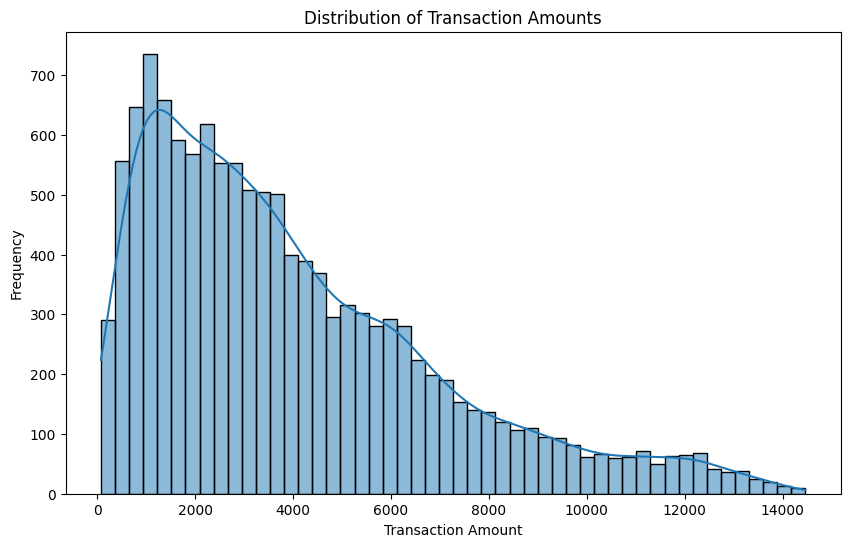

In [35]:
# Convert to Pandas for visualization
transaction_amounts = df.select("Transaction Amount").sample(False, 0.1).toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(transaction_amounts['Transaction Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


# Time Series Analysis of Transactions

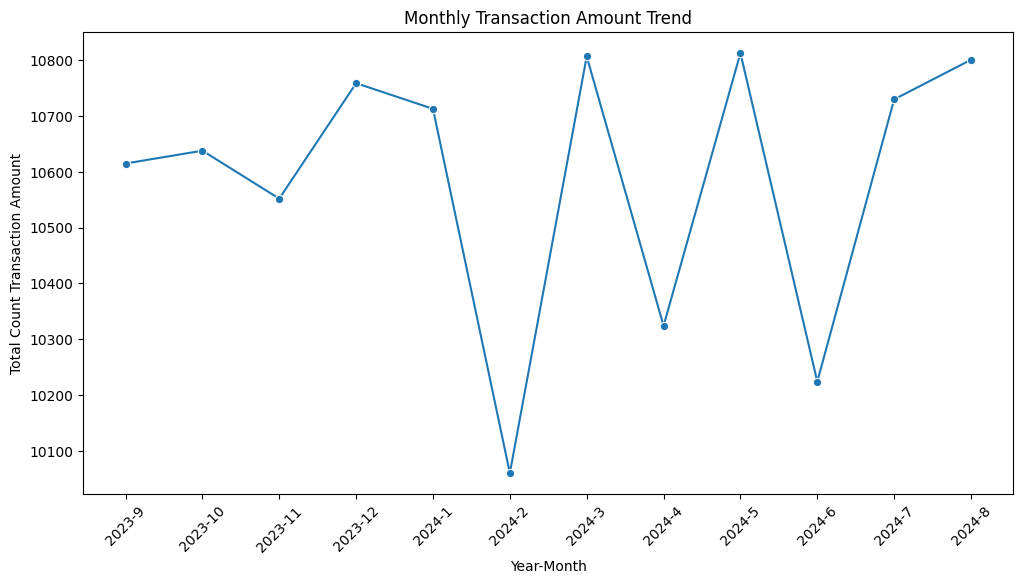

In [36]:
# Extract year, month, day for deeper time-series analysis
from pyspark.sql.functions import year, month, dayofmonth

df_time = df.withColumn("Year", year("Transaction Date/Time")) \
            .withColumn("Month", month("Transaction Date/Time")) \
            .withColumn("Day", dayofmonth("Transaction Date/Time"))

# Convert to Pandas for plotting time series
df_time_pd = df_time.groupBy("Year", "Month").count().orderBy("Year", "Month").toPandas()

# Plot time series
plt.figure(figsize=(12,6))
sns.lineplot(data=df_time_pd, x=df_time_pd["Year"].astype(str) + '-' + df_time_pd["Month"].astype(str), y="count", marker="o")
             
plt.title("Monthly Transaction Amount Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Count Transaction Amount")
plt.xticks(rotation=45)
plt.show()


##  Heatmap of Transaction Density

In [37]:
import folium
from folium.plugins import HeatMap

# Define df_geo_pd or execute the cell that defines it before running this code
df_geo_pd = df.select("Latitude", "Longitude").toPandas()

# Convert to latitude-longitude pairs for folium
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_geo_pd.iterrows()]

# Create a map centered around global coordinates
map_center = [0, 0]  # Center of the map
transaction_map = folium.Map(location=map_center, zoom_start=2)

# Add a heatmap layer
HeatMap(heat_data, radius=10).add_to(transaction_map)

# Save the map as HTML to view
transaction_map.save("transaction_heatmap.html")


In [61]:
import folium

# Assuming df_geo_pd has columns 'Latitude' and 'Longitude'

# Create a map centered around the median of the latitude and longitude data
map_center = [df_geo_pd['Latitude'].median(), df_geo_pd['Longitude'].median()]
geo_map = folium.Map(location=map_center, zoom_start=5)

# Add markers based on latitude and longitude
for index, row in df_geo_pd.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Lat: {row['Latitude']}, Lon: {row['Longitude']}"
    ).add_to(geo_map)

# Save the map as HTML to view
geo_map.save("geo_map.html")


In [63]:
import folium

# Create a map centered around the median latitude and longitude
map_center = [df_geo_pd['Latitude'].median(), df_geo_pd['Longitude'].median()]
circle_map = folium.Map(location=map_center, zoom_start=5)

# Add circle markers for each point
for index, row in df_geo_pd.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=5000,  # Radius in meters
        color='blue',
        fill=True,
        fill_color='cyan',
        popup=f"Location: ({row['Latitude']}, {row['Longitude']})"
    ).add_to(circle_map)

# Save the map as HTML to view
circle_map.save("circle_map.html")


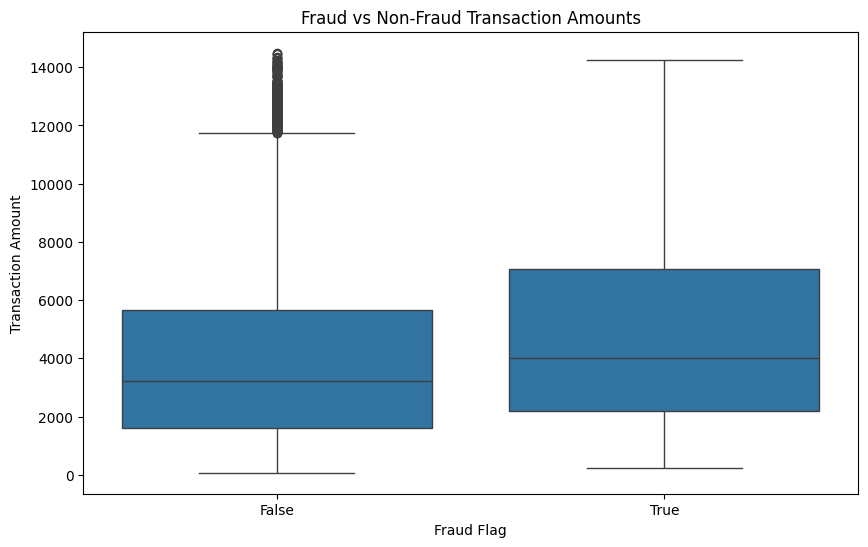

In [38]:
# Convert to Pandas for visualization
fraud_data = df.select("Fraud Flag", "Transaction Amount").sample(False, 0.1).toPandas()

# Plot boxplot of transaction amounts for fraud vs non-fraud transactions
plt.figure(figsize=(10,6))
sns.boxplot(x="Fraud Flag", y="Transaction Amount", data=fraud_data)
plt.title("Fraud vs Non-Fraud Transaction Amounts")
plt.xlabel("Fraud Flag")
plt.ylabel("Transaction Amount")
plt.show()


## Heatmap of Correlation between Features

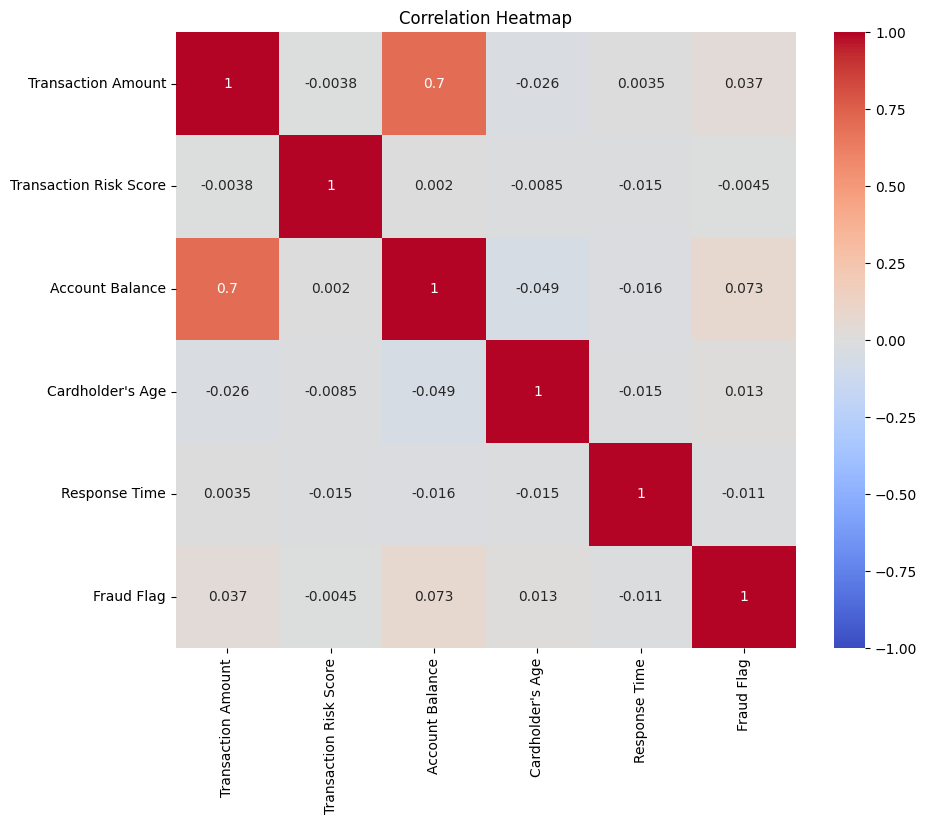

In [39]:
# Correlation matrix for numeric columns
numeric_cols = ["Transaction Amount", "Transaction Risk Score", "Account Balance", "Cardholder's Age", "Response Time", "Fraud Flag"]
df_numeric = df.select([col(c).cast(DoubleType()) for c in numeric_cols])

# Convert to Pandas
corr_matrix = df_numeric.sample(False, 0.1).toPandas().corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


## Customer Segmentation Analysis

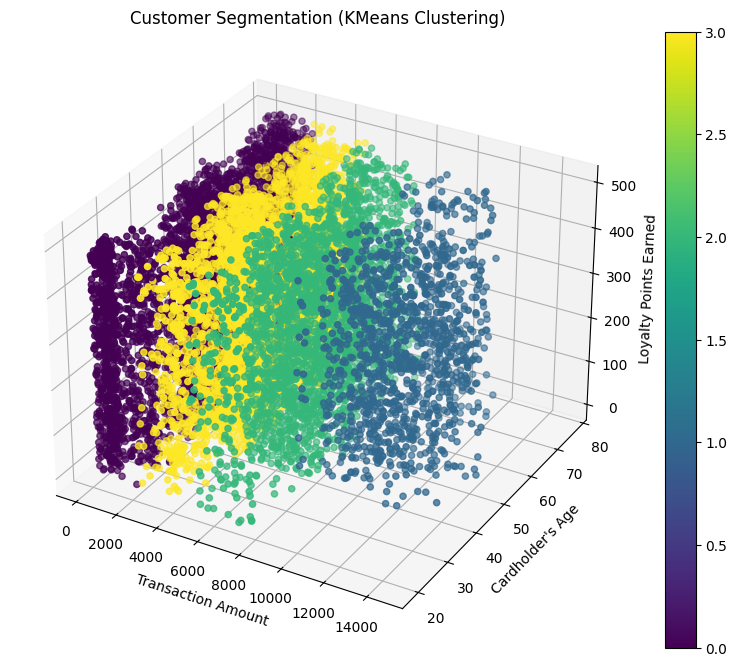

In [40]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Feature columns for clustering (select relevant features)
feature_cols = ["Transaction Amount", "Cardholder's Age", "Loyalty Points Earned", "Transaction Risk Score"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Assemble feature vectors
df_features = assembler.transform(df)

# Apply KMeans clustering
kmeans = KMeans(k=4, seed=1)
model = kmeans.fit(df_features)

# Make predictions
df_clustered = model.transform(df_features)

# Visualize the clusters
cluster_centers = model.clusterCenters()

# Convert to Pandas for plotting
df_clustered_pd = df_clustered.select("Transaction Amount", "Cardholder's Age", "Loyalty Points Earned", "Transaction Risk Score", "prediction").sample(False, 0.1).toPandas()

# 3D Scatter Plot of clusters (Transaction Amount, Age, and Loyalty Points)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df_clustered_pd['Transaction Amount'], df_clustered_pd['Cardholder\'s Age'], 
                     df_clustered_pd['Loyalty Points Earned'], c=df_clustered_pd['prediction'], cmap='viridis')

# Adding axis labels and title
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Cardholder\'s Age')
ax.set_zlabel('Loyalty Points Earned')
plt.title('Customer Segmentation (KMeans Clustering)')

# Color bar for cluster labels
fig.colorbar(scatter)
plt.show()


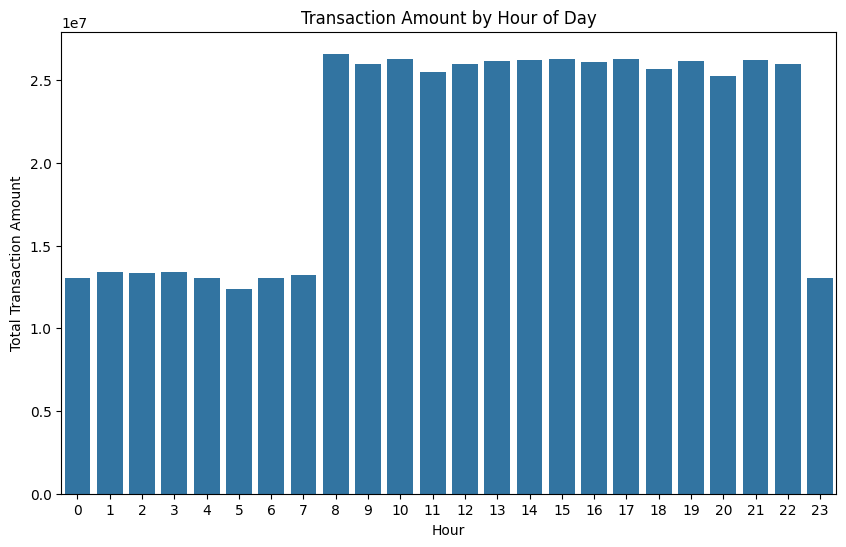

In [41]:
from pyspark.sql.functions import hour

# Extract hour from the transaction time
df_hourly = df.withColumn("Hour", hour("Transaction Date/Time"))

# Group by hour and get total transaction amount
df_hourly_pd = df_hourly.groupBy("Hour").sum("Transaction Amount").orderBy("Hour").toPandas()

# Plot transaction amount by hour
plt.figure(figsize=(10,6))
sns.barplot(x="Hour", y="sum(Transaction Amount)", data=df_hourly_pd)
plt.title("Transaction Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Transaction Amount")
plt.show()


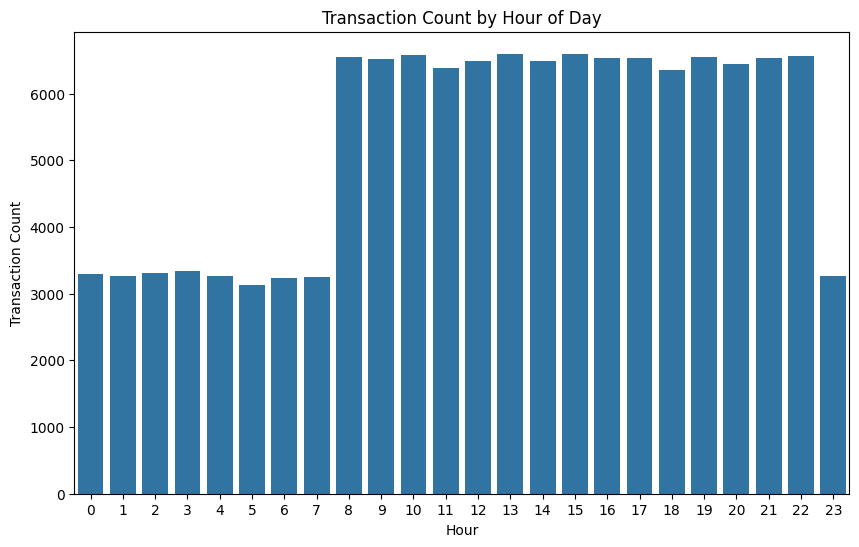

In [42]:
from pyspark.sql.functions import hour

# Extract hour from the transaction time
df_hourly = df.withColumn("Hour", hour("Transaction Date/Time"))

# Group by hour and count the number of transactions
df_hourly_pd = df_hourly.groupBy("Hour").count().orderBy("Hour").toPandas()

# Plot transaction count by hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x="Hour", y="count", data=df_hourly_pd)
plt.title("Transaction Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Transaction Count")
plt.show()


C:\Users\shere\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\pandas\types.py:563: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if not is_datetime64tz_dtype(pser.dtype):
C:\Users\shere\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyspark\sql\pandas\types.py:379: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if is_datetime64tz_dtype(s.dtype):


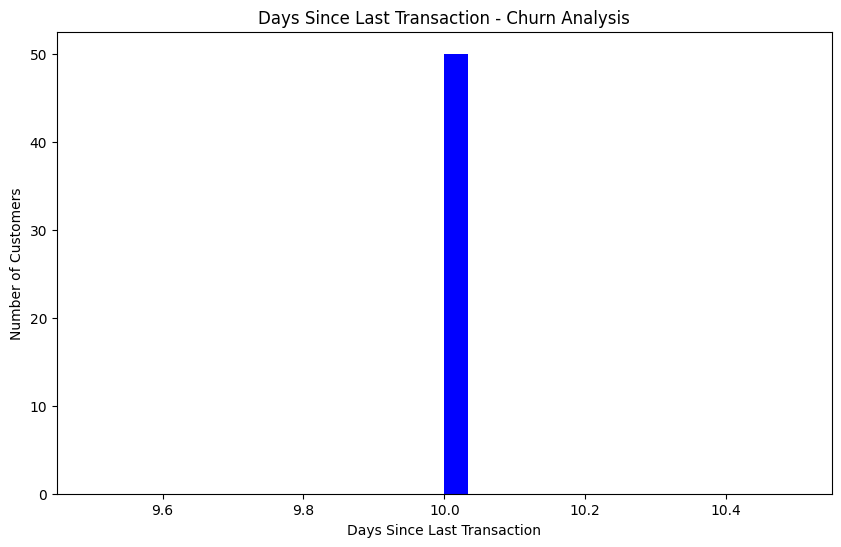

In [43]:
# Days Since Last Transaction
df_last_transaction_pd = df_last_transaction.toPandas()

plt.figure(figsize=(10, 6))
plt.hist(df_last_transaction_pd['Days Since Last Transaction'], bins=30, color='blue')
plt.title("Days Since Last Transaction - Churn Analysis")
plt.xlabel("Days Since Last Transaction")
plt.ylabel("Number of Customers")
plt.show()
